<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/top_bottom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOP DOWN PREDICTION
#### ftjioesman@hotmail.com | June 8, 2021

Following AI works from previous team member I continued the finetuning and overall prediction with lower resolution images to have more choices of images to train and shorter time to compute.
As suggested I would like to share few prediction below with the top down prediction approach.

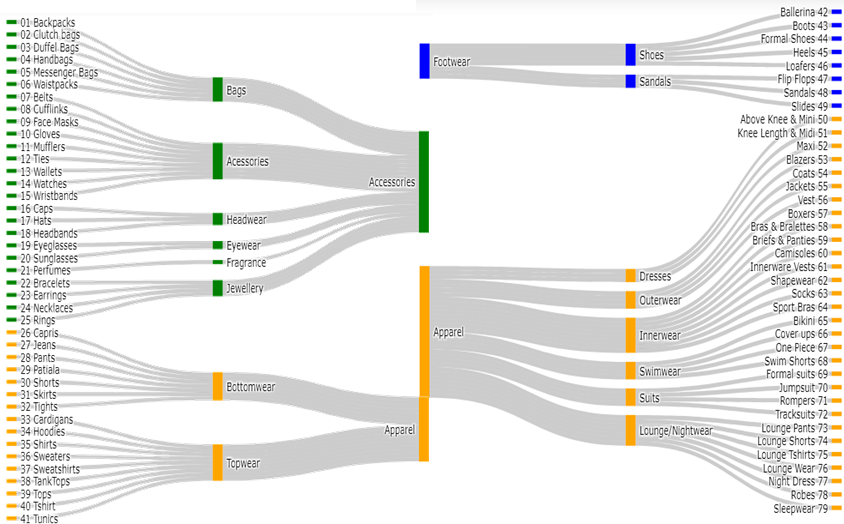

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
#Extracting pre-processed images classified into 79 types as flattened numpy array
# data=pd.read_csv('79_16_03_TSM.csv')
data=pd.read_csv('https://fashion.s3.us-east-2.amazonaws.com/79_16_03_TSM.csv')

In [ ]:
data

,type_doc,type,type_desc,sub,sub_desc,majr,majr_desc,filename,1,2,...,775,776,777,778,779,780,781,782,783,784
0,0,1,backpack,1,Bags,1,Accessories,00059d62e325295ce6fb133676c110fe.jpg,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,backpack,1,Bags,1,Accessories,0009d006873828afbe6c8957c7b941d6.jpg,0,0,...,29,4,0,0,0,0,0,0,0,0
2,2,1,backpack,1,Bags,1,Accessories,000b4634db6b66c59bc065b1d53a22c5.jpg,0,0,...,153,137,86,21,0,12,3,0,0,0
3,3,1,backpack,1,Bags,1,Accessories,00207fc76484655207579baed06733f1.jpg,0,0,...,33,1,0,2,5,0,0,0,0,0
4,4,1,backpack,1,Bags,1,Accessories,00590df6f85a899fd079c21e800ffcda.jpg,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108317,169,79,sleepwear,16,Lounges,2,Apparel,d68f450eec7557dc24619ec234a39e09.jpg,0,0,...,217,125,12,0,0,0,0,0,0,0
108318,170,79,sleepwear,16,Lounges,2,Apparel,e4b9fe94cf9d21778610ba7940baaf2e.jpg,0,0,...,0,0,0,0,0,0,0,0,0,0
108319,171,79,sleepwear,16,Lounges,2,Apparel,e707a33db116304899b5a9fe633519b4.jpg,0,0,...,0,0,0,0,0,0,0,0,0,0
108320,172,79,sleepwear,16,Lounges,2,Apparel,f9d0d98c58f6303f8f39ec0b86a4fdbc.jpg,0,0,...,230,181,27,0,0,0,0,0,0,0


# MAJOR PREDICTION

In [ ]:
#trimming label and features' train data for oversampling
X=data.drop(['type_doc', 'type_desc', 'sub_desc', 'majr_desc', 'filename'], axis=1)
y=data[['majr']]

In [ ]:
#CHECK FOR MAJOR DATA IMBALANCE 
print(data['majr_desc'].value_counts())

#IDENTIFY MAJOR CATEGORY WITH LONGEST DATA
longest = data['majr_desc'].value_counts().keys()[0]
print(longest, ' would be a reference for others (ROS)')

Apparel        59630
Accessories    38118
Footwear       10574
Name: majr_desc, dtype: int64
Apparel  would be a reference for others (ROS)


In [ ]:
#BALANCING THE IMBALANCED DATA
smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

#SAVING the balanced major data into data_01.csv
X1.to_csv('data_01.csv')

#THE DATA IS NOW BALANCED
y1['majr'].value_counts()

3    59630
2    59630
1    59630
Name: majr, dtype: int64

In [ ]:
#TRAINED THE MODEL
X_train, X_test, y_train, y_test = train_test_split(\
    X1.drop(['majr','type', 'sub'], axis=1), y1, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.8882508384998475

In [ ]:
#Example of Eyewear images
X[X['type']==19]

,type,majr,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
15994,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15995,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16979,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16980,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16981,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16982,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Example of Bra/Bralette images
X[X['type']==58]

,type,majr,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
90650,58,2,0,0,0,0,0,0,0,0,...,68,68,73,47,45,108,85,16,0,0
90651,58,2,0,0,0,0,0,0,0,0,...,55,60,64,5,0,65,73,13,0,0
90652,58,2,0,0,0,0,0,0,0,0,...,80,87,89,98,76,130,119,14,0,0
90653,58,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90654,58,2,0,0,0,0,0,0,0,0,...,63,71,69,83,39,100,83,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92228,58,2,0,0,0,0,0,0,0,0,...,65,67,81,157,105,70,64,13,0,0
92229,58,2,0,0,0,0,0,0,0,0,...,83,91,75,0,70,109,96,17,0,0
92230,58,2,0,0,0,0,0,0,0,0,...,82,93,107,111,26,106,107,19,0,0
92231,58,2,0,0,0,0,0,0,0,0,...,86,90,105,43,0,0,2,4,0,0


the length of this flattened image is  784
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0  

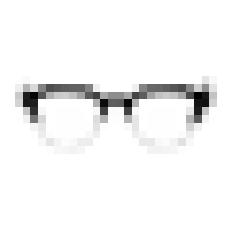

In [ ]:
example_1 = [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   5,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22,   6,   0,   0,  13,  61,  31, 100, 144,
        137, 131, 129, 127, 102,  13,   0,   0,   0,   0,  13, 101, 123,
        125, 130, 138, 146,  99,  39,  91,  23,   0,   0,  44, 185, 204,
        138,  64,  44,  41,  51,  75, 134, 153,  71,  93,  93,  71, 152,
        133,  74,  51,  44,  48,  70, 147, 208, 188,  50,   0,   0,  36,
        188, 182,   0,   0,   0,   0,   0,   0,   0,  66, 198, 130, 132,
        200,  65,   0,   0,   0,   0,   0,   0,   5, 191, 194,  37,   0,
          0,   0,  49, 167,   8,   0,   1,   1,   1,   1,   0,   7, 153,
          4,   4, 153,   6,   0,   1,   1,   1,   1,   0,  20, 184,  51,
          0,   0,   0,   0,  12, 113,  34,   0,   1,   1,   1,   1,   0,
         28,  61,   2,   2,  62,  21,   0,   1,   1,   1,   1,   0,  65,
        133,  11,   0,   0,   0,   0,   0,  10,  20,   0,   1,   1,   1,
          1,   1,  23,   2,   0,   0,   5,  21,   0,   1,   1,   1,   1,
          0,  35,  12,   0,   0,   0,   0,   0,   0,   1,  15,   3,   0,
          1,   1,   0,   6,  13,   0,   0,   0,   0,  14,   7,   0,   1,
          1,   0,   4,  15,   0,   0,   0,   0,   0,   0,   0,   0,   6,
         21,   9,   3,   5,  14,  15,   1,   0,   0,   0,   0,   2,  18,
         18,   6,   4,  10,  25,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2,   7,   8,  10,   8,   0,   0,   0,   0,   0,   0,
          0,   0,  10,  11,   9,   8,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]

print('the length of this flattened image is ',len(example_1))

image=np.reshape(np.expand_dims(np.array(example_1), axis=0), (28, 28))

for i in range(28):
    for j in list(image[i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')
    
plt.imshow(image, cmap='gray_r')
plt.axis('off');

ai_confidence_1 = lr.predict_proba(np.expand_dims(np.array(example_1), axis=0))
print('major category ai_confidence are', ai_confidence_1)
print('Likelihood to be accessories is ',ai_confidence_1[0][0]*100,'%')
print('Likelihood to be apparel is ',ai_confidence_1[0][1]*100,'%')
print('Likelihood to be footwear is ',ai_confidence_1[0][2]*100,'%')

the length of this flattened image is  784
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   1  32  20   0   0   0   0   0   0   0   0   0   0   0  17  26   1   0   0   0   0   0   0 

  0   0   0   0   0  47 103 121  18   0   0   0   0   0   0   0   0   0  31  85  29  46   0   0   0   0   0   0 

  0   0   0   0   0  66  63  82  91   0   0   0   0   0   0   0   0   0  78  88   0  63   1   0   0   0   0   0 

  0   0   0   0   0  50 105  54 131   0   0   0   0   0   0   0   0   0  83 105   0  66   3   0   0   0   0   0 

  0   0   0   0   0  25 137  40 128   1   0  

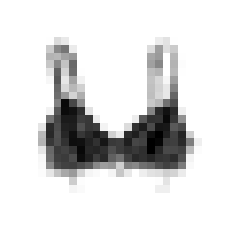

In [ ]:
example_2 = [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,  32,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  17,  26,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  47, 103, 121,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  31,  85,  29,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  66,  63,  82,  91,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  78,  88,   0,  63,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  50, 105,  54, 131,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  83, 105,   0,  66,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  25, 137,  40, 128,   1,
          0,   0,   0,   0,   0,   0,   0,   0,  59,  66,   0,  62,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7, 146,  22,
         80,  13,   0,   0,   0,   0,   0,   0,   0,   0,  52,  36,   8,
         86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        132,  34,  62,  41,   0,   0,   0,   0,   0,   0,   0,   0,  55,
         40,  21, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 128,  90,  38,  71,   0,   0,   0,   0,   0,   0,   0,
          0,  57,  36,  21, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 110, 214, 161,  99,   0,   0,   0,   0,   0,
          0,   0,   0,  49,  63, 124, 154,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  12, 146, 213, 207, 182,  26,   0,   0,
          0,   0,   0,   0,   0, 107, 185, 207, 185,  14,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 121, 162, 199, 199, 169, 173,
         17,   0,   0,   0,   0,  16, 144, 178, 177, 214, 175,  95,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  23, 185, 156, 193, 196,
        153, 175, 169,  11,   0,   0,  31, 179, 197, 157, 203, 202, 144,
        157,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62, 187, 152,
        189, 209, 175, 186, 202, 179,  41,  19, 185, 196, 170, 208, 222,
        194, 165, 191,  43,   0,   0,   0,   0,   0,   0,   0,   0,  66,
        173, 155, 178, 210, 208, 192, 179, 203, 172, 169, 196, 162, 166,
        222, 217, 170, 168, 186, 113,  14,   0,   0,   0,   0,   0,   0,
          0,  23, 132, 171, 164, 177, 216, 189, 191, 180, 154, 170, 181,
        174, 182, 223, 189, 158, 160, 165,  60,   3,   0,   0,   0,   0,
          0,   0,   0,   7, 128, 167, 171, 156, 211, 194, 170, 186, 139,
        122, 165, 186, 181, 190, 177, 175, 184, 151,  11,   0,   0,   0,
          0,   0,   0,   0,   0,   6, 103, 156, 165, 168, 156, 143, 104,
         86,  91,  42, 111, 104, 125, 133, 155, 166, 156, 115,   6,   0,
          0,   0,   0,   0,   0,   0,   0,   3,  22,  53,  76,  88,  38,
          9,   5,   0,   9,  49,  20,   0,  15,  26,  29,  43,  38,  18,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         44,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  24,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         14,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]

print('the length of this flattened image is ',len(example_2))

image=np.reshape(np.expand_dims(np.array(example_2), axis=0), (28, 28))

for i in range(28):
    for j in list(image[i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')
    
plt.imshow(image, cmap='gray_r')
plt.axis('off');

ai_confidence_2 = lr.predict_proba(np.expand_dims(np.array(example_2), axis=0))
print('major category ai_confidence are', ai_confidence_2)
print('Likelihood to be accessories is ',ai_confidence_2[0][0]*100,'%')
print('Likelihood to be apparel is ',ai_confidence_2[0][1]*100,'%')
print('Likelihood to be footwear is ',ai_confidence_2[0][2]*100,'%')

In [ ]:
ai_confidence_1

array([[0.99165523, 0.00731956, 0.00102522]])

In [ ]:
np.argmax(ai_confidence_1)

0

In [ ]:
ai_confidence_2

array([[0.43224096, 0.444946  , 0.12281304]])

In [ ]:
np.argmax(ai_confidence_2)

1

# SUB PREDICTION

Filtering out less likely major category and follow similar prediction step

### SUB PREDICTION FOR EYEGLASS

In [ ]:
#trimming label and features' train data for oversampling
X=data[data['majr']==np.argmax(ai_confidence_1)+1]\
    .drop(['type_doc', 'type_desc', 'sub_desc', 'majr_desc', 'filename'], axis=1)
y=data[data['majr']==np.argmax(ai_confidence_1)+1][['sub']]

In [ ]:
#CHECK FOR SUB DATA IMBALANCE 
print(X['sub'].value_counts())

#IDENTIFY SUB CATEGORY WITH LONGEST DATA
longest = X['sub'].value_counts().keys()[0]
print(longest, 'th sub would be a reference for others (ROS)')

6    14741
2     7957
4     6704
1     6030
3     2007
5      679
Name: sub, dtype: int64
6 th sub would be a reference for others (ROS)


In [ ]:
#BALANCING THE IMBALANCED SUB
smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

#SAVING the balanced major data into data_02.csv
X1.to_csv('data_02.csv')

#THE DATA IS NOW BALANCED
y1['sub'].value_counts()

6    14741
5    14741
4    14741
3    14741
2    14741
1    14741
Name: sub, dtype: int64

In [ ]:
#TRAINED THE MODEL
X_train, X_test, y_train, y_test = train_test_split(\
    X1.drop(['majr','type', 'sub'], axis=1), y1, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.846238180074003

In [ ]:
ai_confidence_1b = lr.predict_proba(np.expand_dims(np.array(example_1), axis=0))
print('Likelihood to be sub category of bag is ',ai_confidence_1b[0][0]*100,'%')
print('Likelihood to be sub category of accessories is ',ai_confidence_1b[0][1]*100,'%')
print('Likelihood to be sub category of headware is ',ai_confidence_1b[0][2]*100,'%')
print('Likelihood to be sub category of eyewear is ',ai_confidence_1b[0][3]*100,'%')
print('Likelihood to be sub category of fragrance is ',ai_confidence_1b[0][4]*100,'%')
print('Likelihood to be sub category of jewellery footwear is ',ai_confidence_1b[0][5]*100,'%')

Likelihood to be sub category of bag is  0.009659298091580894 %
Likelihood to be sub category of accessories is  0.005801108559837998 %
Likelihood to be sub category of headware is  0.004054623926154409 %
Likelihood to be sub category of eyewear is  99.98037485609831 %
Likelihood to be sub category of fragrance is  3.6047162754486135e-09 %
Likelihood to be sub category of jewellery footwear is  0.00011010971939580357 %


In [ ]:
#INFORMATION TO PASS FOR TYPE PREDICTION
np.argmax(ai_confidence_1b)

3

### SUB PREDICTION FOR BRA

In [ ]:
#trimming label and features' train data for oversampling
X=data[data['majr']==np.argmax(ai_confidence_2)+1]\
    .drop(['type_doc', 'type_desc', 'sub_desc', 'majr_desc', 'filename'], axis=1)
y=data[data['majr']==np.argmax(ai_confidence_2)+1][['sub']]

In [ ]:
#CHECK FOR SUB DATA IMBALANCE 
print(X['sub'].value_counts())

#IDENTIFY SUB CATEGORY WITH LONGEST DATA
longest = X['sub'].value_counts().keys()[0]
print(longest, 'th sub would be a reference for others (ROS)')

8     16428
7     10577
12    10383
13     9663
14     4151
11     3554
16     2537
15     2337
Name: sub, dtype: int64
8 th sub would be a reference for others (ROS)


In [ ]:
#BALANCING THE IMBALANCED SUB
smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

#SAVING the balanced major data into data_02.csv
X1.to_csv('data_02.csv')

#THE DATA IS NOW BALANCED
y1['sub'].value_counts()

16    16428
15    16428
14    16428
13    16428
12    16428
11    16428
8     16428
7     16428
Name: sub, dtype: int64

In [ ]:
#TRAINED THE MODEL
X_train, X_test, y_train, y_test = train_test_split(\
    X1.drop(['majr','type', 'sub'], axis=1), y1, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.6216278533548536

In [ ]:
ai_confidence_2b = lr.predict_proba(np.expand_dims(np.array(example_2), axis=0))
print('Likelihood to be sub category of bottomwear is ',ai_confidence_2b[0][0]*100,'%')
print('Likelihood to be sub category of topwear is ',ai_confidence_2b[0][1]*100,'%')
print('Likelihood to be sub category of dresses is ',ai_confidence_2b[0][2]*100,'%')
print('Likelihood to be sub category of outerwear is ',ai_confidence_2b[0][3]*100,'%')
print('Likelihood to be sub category of Innerware is ',ai_confidence_2b[0][4]*100,'%')
print('Likelihood to be sub category of swimwear is ',ai_confidence_2b[0][5]*100,'%')
print('Likelihood to be sub category of suits is ',ai_confidence_2b[0][6]*100,'%')
print('Likelihood to be sub category of loungewaear is ',ai_confidence_2b[0][7]*100,'%')

Likelihood to be sub category of bottomwear is  0.8978465167509293 %
Likelihood to be sub category of topwear is  3.367532269041 %
Likelihood to be sub category of dresses is  4.052319207711038 %
Likelihood to be sub category of outerwear is  3.8345735782866894 %
Likelihood to be sub category of Innerware is  69.66006921574561 %
Likelihood to be sub category of swimwear is  17.650754303623 %
Likelihood to be sub category of suits is  0.4509261537499242 %
Likelihood to be sub category of loungewaear is  0.08597875509183804 %


# TYPE PREDICTION

### TYPE PREDICTION FOR EYEWEAR

In [ ]:
#trimming label and features' train data for oversampling
X=data[data['sub']==np.argmax(ai_confidence_1b)+1]\
    .drop(['type_doc', 'type_desc', 'sub_desc', 'majr_desc', 'filename'], axis=1)
y=data[data['sub']==np.argmax(ai_confidence_1b)+1][['type']]

In [ ]:
#CHECK FOR SUB DATA IMBALANCE 
print(X['type'].value_counts())

#IDENTIFY SUB CATEGORY WITH LONGEST DATA
longest = X['type'].value_counts().keys()[0]
print(longest, 'th sub would be a reference for others (ROS)')

20    5714
19     990
Name: type, dtype: int64
20 th sub would be a reference for others (ROS)


In [ ]:
#BALANCING THE IMBALANCED TYPE
smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

#SAVING the balanced major data into data_02.csv
X1.to_csv('data_03.csv')

#THE DATA IS NOW BALANCED
y1['type'].value_counts()

20    5714
19    5714
Name: type, dtype: int64

In [ ]:
#TRAINED THE MODEL
X_train, X_test, y_train, y_test = train_test_split(\
    X1.drop(['majr','type', 'sub'], axis=1), y1, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.9899257688229056

In [ ]:
ai_confidence_1c = lr.predict_proba(np.expand_dims(np.array(example_1), axis=0))
ai_confidence_1c
print('Likelihood to be eyeglasses is ',ai_confidence_1c[0][0]*100,'%')
print('Likelihood to be sunglasses is ',ai_confidence_1c[0][1]*100,'%')


Likelihood to be eyeglasses is  100.0 %
Likelihood to be sunglasses is  1.6394566031286566e-39 %


### TYPE PREDICTION FOR BRA

In [ ]:
#trimming label and features' train data for oversampling
X=data[data['sub']==np.argmax(ai_confidence_2b)+9]\
    .drop(['type_doc', 'type_desc', 'sub_desc', 'majr_desc', 'filename'], axis=1)
y=data[data['sub']==np.argmax(ai_confidence_2b)+9][['type']]

In [ ]:
#CHECK FOR SUB DATA IMBALANCE 
print(X['type'].value_counts())

#IDENTIFY SUB CATEGORY WITH LONGEST DATA
# longest = X['type'].value_counts().keys()[0]
# print(longest, 'th sub would be a reference for others (ROS)')

63    3788
59    2143
58    1583
57    1016
64     421
62     339
61     205
60     168
Name: type, dtype: int64


In [ ]:
#BALANCING THE IMBALANCED TYPE
smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

#SAVING the balanced major data into data_02.csv
X1.to_csv('data_02.csv')

#THE DATA IS NOW BALANCED
y1['type'].value_counts()

63    3788
62    3788
61    3788
60    3788
59    3788
58    3788
57    3788
64    3788
Name: type, dtype: int64

In [ ]:
#TRAINED THE MODEL
X_train, X_test, y_train, y_test = train_test_split(\
    X1.drop(['majr','type', 'sub'], axis=1), y1, test_size=0.33, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.8651134886511349

In [ ]:
ai_confidence_2c = lr.predict_proba(np.expand_dims(np.array(example_2), axis=0))
print('Likelihood to be boxer is ',ai_confidence_2c[0][0]*100,'%')
print('Likelihood to be bra/bralette is ',ai_confidence_2c[0][1]*100,'%')
print('Likelihood to be briefs/panties is ',ai_confidence_2c[0][2]*100,'%')
print('Likelihood to be camisoles is ',ai_confidence_2c[0][3]*100,'%')
print('Likelihood to be innervest is ',ai_confidence_2c[0][4]*100,'%')
print('Likelihood to be shapewear is ',ai_confidence_2c[0][5]*100,'%')
print('Likelihood to be socks is ',ai_confidence_2c[0][6]*100,'%')
print('Likelihood to be sport bras is ',ai_confidence_2c[0][7]*100,'%')


Likelihood to be boxer is  8.057718359671666 %
Likelihood to be bra/bralette is  79.81849937028194 %
Likelihood to be briefs/panties is  0.1836424029691872 %
Likelihood to be camisoles is  0.0007126126908478653 %
Likelihood to be innervest is  5.221357173207943e-08 %
Likelihood to be shapewear is  0.10554278347885851 %
Likelihood to be socks is  11.78561660824276 %
Likelihood to be sport bras is  0.04826781045117365 %
